In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UPENN-GBM_clinical_info_v2.1.csv')

In [3]:
df = df.replace("Not Available", pd.NA)

In [4]:
df.head()

,ID,Gender,Age_at_scan_years,Survival_from_surgery_days_UPDATED,Survival_Status,Survival_Censor,IDH1,MGMT,KPS,GTR_over90percent,Time_since_baseline_preop,PsP_TP_score
0,UPENN-GBM-00001_11,F,52.16,960,Deceased,<NA>,Wildtype,<NA>,<NA>,Y,0,NaN
1,UPENN-GBM-00002_11,F,61.30,291,Deceased,<NA>,Wildtype,<NA>,<NA>,Y,0,NaN
2,UPENN-GBM-00003_11,M,42.82,2838,Deceased,<NA>,Wildtype,<NA>,<NA>,Y,0,NaN
3,UPENN-GBM-00004_11,M,33.43,623,Deceased,<NA>,NOS/NEC,<NA>,<NA>,Y,0,NaN
4,UPENN-GBM-00005_11,M,53.33,1143,Deceased,<NA>,Wildtype,<NA>,<NA>,Y,0,NaN


In [5]:
df.describe()

,Age_at_scan_years,PsP_TP_score
count,671.000000,60.000000
mean,62.464978,4.433333
std,12.365078,1.533432
min,18.650000,1.000000
25%,55.260000,3.000000
50%,63.020000,5.000000
75%,71.250000,6.000000
max,88.500000,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  671 non-null    object 
 1   Gender                              671 non-null    object 
 2   Age_at_scan_years                   671 non-null    float64
 3   Survival_from_surgery_days_UPDATED  644 non-null    object 
 4   Survival_Status                     671 non-null    object 
 5   Survival_Censor                     27 non-null     object 
 6   IDH1                                671 non-null    object 
 7   MGMT                                323 non-null    object 
 8   KPS                                 75 non-null     object 
 9   GTR_over90percent                   633 non-null    object 
 10  Time_since_baseline_preop           663 non-null    object 
 11  PsP_TP_score                        60 non-nu

In [7]:
df.isnull().sum()

ID                                      0
Gender                                  0
Age_at_scan_years                       0
Survival_from_surgery_days_UPDATED     27
Survival_Status                         0
Survival_Censor                       644
IDH1                                    0
MGMT                                  348
KPS                                   596
GTR_over90percent                      38
Time_since_baseline_preop               8
PsP_TP_score                          611
dtype: int64

In [8]:
df = df.drop(columns=["MGMT", "KPS", "PsP_TP_score", "Survival_Censor"])

In [9]:
df.drop(columns=["ID"], inplace=True)
df.dropna(subset=["Survival_from_surgery_days_UPDATED", "GTR_over90percent", "Time_since_baseline_preop"], inplace=True)

In [10]:
df.isnull().sum()

Gender                                0
Age_at_scan_years                     0
Survival_from_surgery_days_UPDATED    0
Survival_Status                       0
IDH1                                  0
GTR_over90percent                     0
Time_since_baseline_preop             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 0 to 666
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              602 non-null    object 
 1   Age_at_scan_years                   602 non-null    float64
 2   Survival_from_surgery_days_UPDATED  602 non-null    object 
 3   Survival_Status                     602 non-null    object 
 4   IDH1                                602 non-null    object 
 5   GTR_over90percent                   602 non-null    object 
 6   Time_since_baseline_preop           602 non-null    object 
dtypes: float64(1), object(6)
memory usage: 37.6+ KB


In [12]:
# categorical_cols = df.select_dtypes(include=["object"]).columns
# print("Categorical Columns:", categorical_cols)

# # Apply One-Hot Encoding
# df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # Display encoded dataset
# df_encoded.head()

In [13]:
# print(df_encoded.describe())

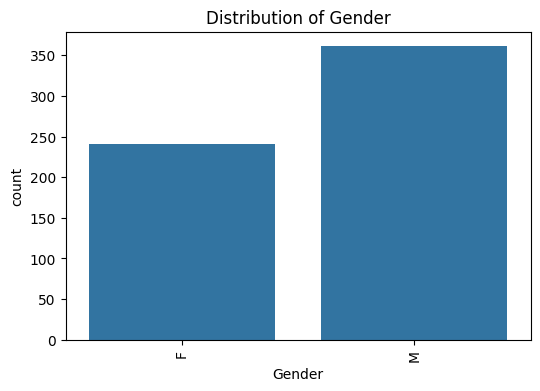

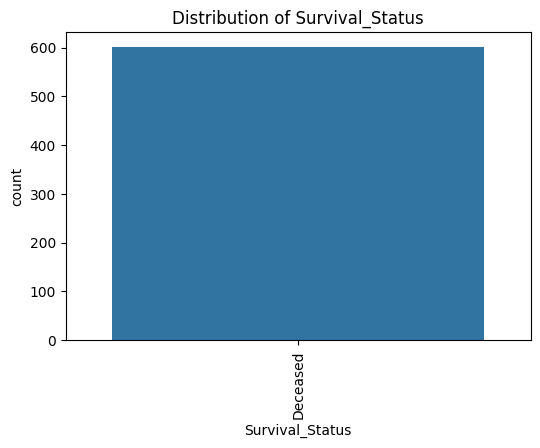

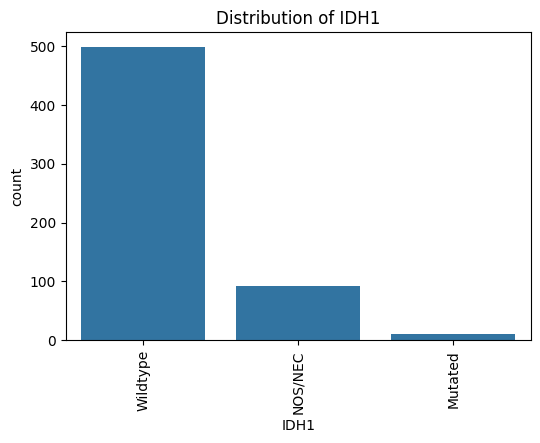

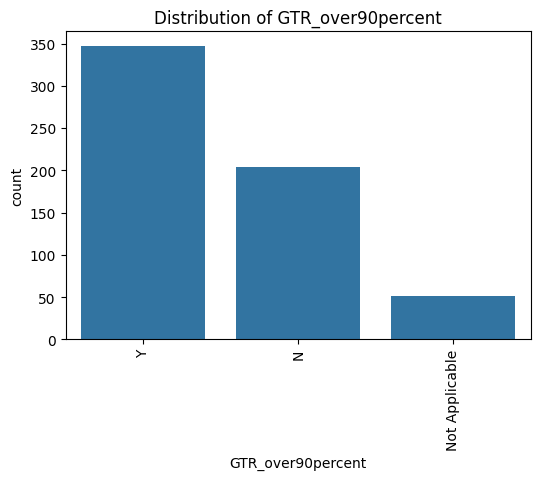

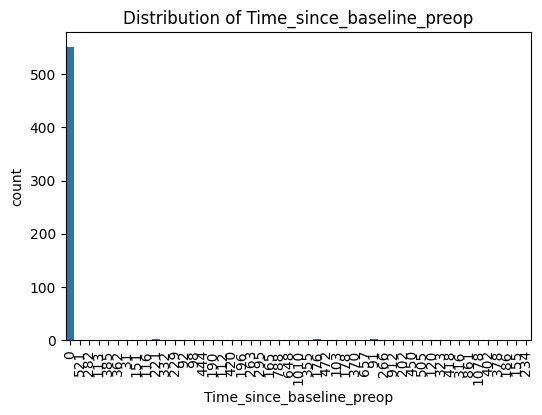

In [16]:
categorical_cols = ["Gender", "Survival_Status", "IDH1", "GTR_over90percent", "Time_since_baseline_preop"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()


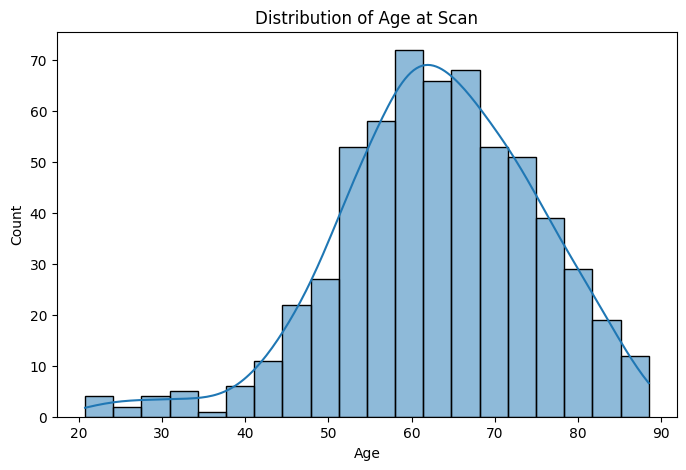

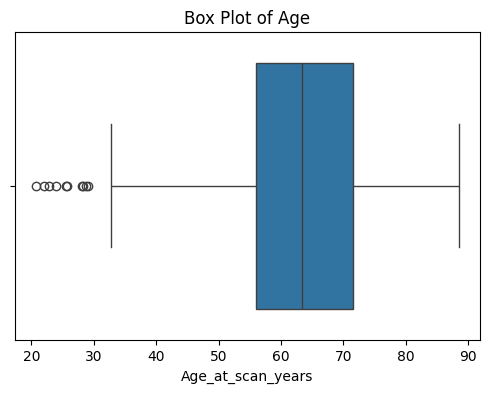

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age_at_scan_years"], bins=20, kde=True)
plt.title("Distribution of Age at Scan")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Age_at_scan_years"])
plt.title("Box Plot of Age")
plt.show()

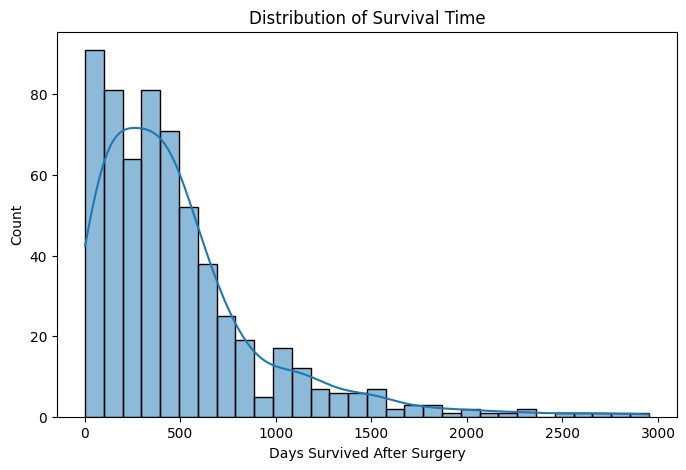

In [18]:
df["Survival_from_surgery_days_UPDATED"] = pd.to_numeric(df["Survival_from_surgery_days_UPDATED"])

plt.figure(figsize=(8, 5))
sns.histplot(df["Survival_from_surgery_days_UPDATED"], bins=30, kde=True)
plt.title("Distribution of Survival Time")
plt.xlabel("Days Survived After Surgery")
plt.ylabel("Count")
plt.show()


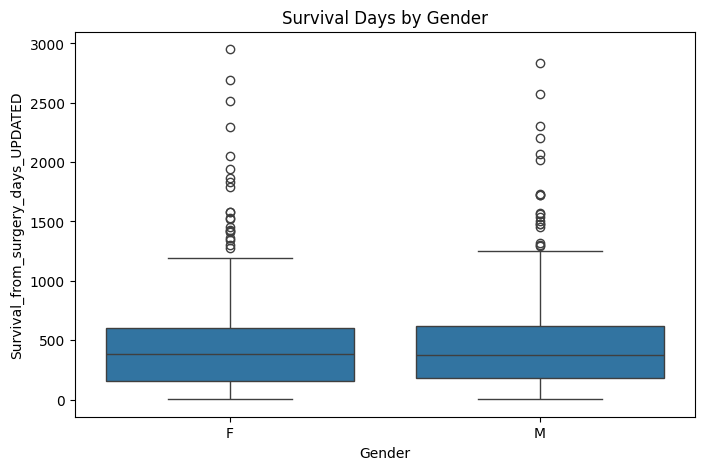

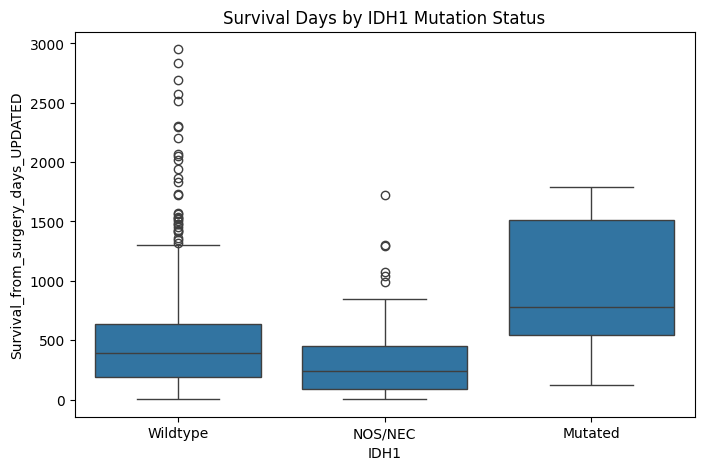

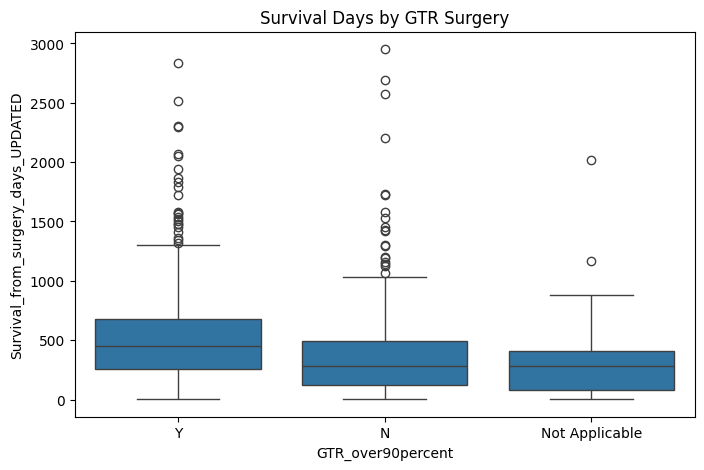

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Survival_from_surgery_days_UPDATED", data=df)
plt.title("Survival Days by Gender")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="IDH1", y="Survival_from_surgery_days_UPDATED", data=df)
plt.title("Survival Days by IDH1 Mutation Status")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="GTR_over90percent", y="Survival_from_surgery_days_UPDATED", data=df)
plt.title("Survival Days by GTR Surgery")
plt.show()

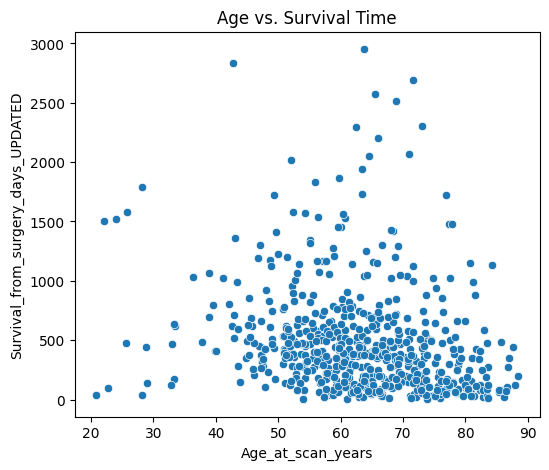

In [20]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Age_at_scan_years", y="Survival_from_surgery_days_UPDATED", data=df)
plt.title("Age vs. Survival Time")
plt.show()